In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r'C:/Users/n10648771/OneDrive - Queensland University of Technology/DataScienceCovid/COVID-19_Data-master/Data/COVID_AU_national_daily_change.csv')



In [3]:
df

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent
0,2020-01-25,4,0,0,0,0,0,0,0
1,2020-01-26,0,0,0,0,0,0,0,0
2,2020-01-27,1,0,0,0,0,0,0,0
3,2020-01-28,0,0,0,0,0,0,0,0
4,2020-01-29,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
237,2020-09-18,48,0,45422,48,63,-9,-1,0
238,2020-09-19,24,0,39050,24,107,-2,-3,-2
239,2020-09-20,13,0,33039,13,100,3,-2,-1
240,2020-09-21,14,0,23436,14,95,-2,-2,-2


In [4]:
fig, ax = plt.subplots(figsize=(15,7))
df[['confirmed','deaths']].plot(ax=ax)

NameError: name 'plt' is not defined

In [5]:
df_NN = df.loc['']

KeyError: ''

In [6]:
cause = pd.read_excel(r'C:/Users/n10648771/OneDrive - Queensland University of Technology/DataScienceCovid/COVID-19_Data-master/Data/ICUcauses.xls')

In [7]:
table=pd.pivot_table(cause,index=['Date'])

In [8]:
df2=table.T

In [9]:
df2['Date']=df2.rename(columns={'Date':'death19'})

In [10]:
df['date']=pd.to_datetime(df['date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
date         242 non-null datetime64[ns]
confirmed    242 non-null int64
deaths       242 non-null int64
tests        242 non-null int64
positives    242 non-null int64
recovered    242 non-null int64
hosp         242 non-null int64
icu          242 non-null int64
vent         242 non-null int64
dtypes: datetime64[ns](1), int64(8)
memory usage: 17.1 KB


In [12]:
df.set_index('date',inplace=True)

In [13]:
a=df.resample('W').sum()

In [14]:
a.shape

(36, 8)

In [15]:
df2.reset_index(inplace=True)

In [16]:
df2['index']=pd.to_datetime(df2['index'])

In [17]:
df2.rename(columns={'Date':'deaths19'}, inplace=True)

In [18]:
a=a['deaths']

In [19]:
a=pd.DataFrame(a)

In [20]:
a.reset_index(inplace=True)
a.drop('date',inplace=True,axis=1)

In [21]:
df2.drop('index', axis=1,inplace=True)

In [22]:
z=pd.concat([a, df2], axis=1)

In [29]:
display(z)

,deaths,deaths19
0,0,38
1,0,39
2,0,43
3,0,40
4,0,55
5,1,38
6,2,42
7,3,41
8,2,48
9,9,38


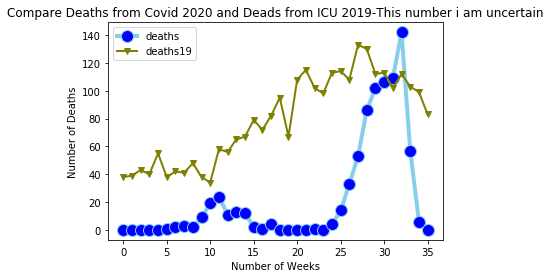

In [34]:
import matplotlib.pyplot as plt 
plt.xlabel('Number of Weeks')
plt.ylabel('Number of Deaths')
plt.title('Compare Deaths from Covid 2020 and Deads from ICU 2019-This number i am uncertain')
plt.plot( z['deaths'], data=z, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( z['deaths19'], data=z, marker='v', color='olive', linewidth=2)
plt.legend()

In [31]:
z.columns

Index(['deaths', 'deaths19'], dtype='object')